# Top Earners in the Movie Industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose the IMDB movie dataset. I've wanted to know how much the different movie genres, directors and production companies have grossed over a period of time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('imdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Show the different types of data for each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# Get the total number of columns
len(df.columns)

21

In [6]:
# List out the columns in a list - similar to the dtypes but without showing the data type
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# Shows the column and some information about the column type and the counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# Shows the number of records that are duplcates - duplicates defined as the same record (line) showing up 2+ times
df.duplicated().sum()

1

In [9]:
# Gets a print of the data
for idx, _ in enumerate(df):
    for k, v in df.iloc[idx].items():
        print(f'{(k, v)}: {type(v)}')
#         break
    print('=' * 50)

('id', 135397): <class 'numpy.int64'>
('imdb_id', 'tt0369610'): <class 'str'>
('popularity', 32.985763): <class 'numpy.float64'>
('budget', 150000000): <class 'numpy.int64'>
('revenue', 1513528810): <class 'numpy.int64'>
('original_title', 'Jurassic World'): <class 'str'>
('cast', "Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"): <class 'str'>
('homepage', 'http://www.jurassicworld.com/'): <class 'str'>
('director', 'Colin Trevorrow'): <class 'str'>
('tagline', 'The park is open.'): <class 'str'>
('keywords', 'monster|dna|tyrannosaurus rex|velociraptor|island'): <class 'str'>
('overview', 'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.'): <class 'str'>
('runtime', 124): <class 'numpy.int64'>
('genres', 'Action|Adventure|Science Fiction|Thriller'): <class 'str'>
('production_companies', 'Universal Studios|Amblin Entertainment|Lege

In [10]:
# Shows the number of records that are null in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# Query missing null values for IMDB ID column
df_missings_imdb = df[df.imdb_id.isnull()]
df_missings_imdb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


In [12]:
df_missings_cast = df[df.imdb_id.isnull()]
df_missings_cast.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.0,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.0,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.0,0.0


In [13]:
df_missings_homepage = df[df.imdb_id.isnull()]
df_missings_homepage.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.0,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.0,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.0,0.0


In [14]:
df.groupby('genres')['genres'].count()

genres
Action                                      63
Action|Adventure                            15
Action|Adventure|Animation                   4
Action|Adventure|Animation|Comedy|Drama      1
Action|Adventure|Animation|Comedy|Family     1
                                            ..
Western|Drama|Crime|Romance                  1
Western|History                              1
Western|History|War                          1
Western|Horror|Thriller                      1
Western|Thriller                             1
Name: genres, Length: 2039, dtype: int64

### Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:
# Drop columns without neccesary information and remove all records with no financial information
df_dropped_columns = df.copy()
df_dropped_columns.drop(['popularity', 'cast', 'homepage','tagline', 'keywords','overview','runtime','vote_count','vote_average','release_date'], axis='columns', inplace=True)
df_dropped_columns.head(5)


,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [17]:
df_dropped_columns.isna().sum()


id                         0
imdb_id                   10
budget                     0
revenue                    0
original_title             0
director                  44
genres                    23
production_companies    1030
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
df_dropped_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_year          10866 non-null  int64  
 9   budget_adj            10866 non-null  float64
 10  revenue_adj           10866 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 933.9+ KB


In [19]:
df_dropped_columns.describe()

,id,budget,revenue,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,1.462570e+07,3.982332e+07,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,3.091321e+07,1.170035e+08,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000000e+00,0.000000e+00,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.000000e+00,0.000000e+00,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.000000e+00,0.000000e+00,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,1.500000e+07,2.400000e+07,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09


In [20]:
number_miss_fin_records = df_dropped_columns.query('budget_adj == 0 or revenue_adj == 0').copy()
len(number_miss_fin_records)


7011

In [21]:
number_miss_fin_records.head()

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
30,280996,tt3168230,0,29355203,Mr. Holmes,Bill Condon,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,0,22354572,Solace,Afonso Poyart,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,30000000,0,Wild Card,Simon West,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,20000000,0,Survivor,James McTeigue,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,Thriller,Furthur Films,2015,0.000000e+00,4.222338e+04


In [22]:
print(f'There are {len(df_dropped_columns)} records in the initial dataset')
print(f'There are {len(number_miss_fin_records)} records with a zero budget adj or rev adj')
print(f'There are {len(df_dropped_columns)-len(number_miss_fin_records)} records without a zero budget adj or rev adj')



There are 10866 records in the initial dataset
There are 7011 records with a zero budget adj or rev adj
There are 3855 records without a zero budget adj or rev adj


In [23]:
df_only_financial_records_budadj = df_dropped_columns.query('budget_adj != 0').copy()
df_only_financial_records_budadj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5170 non-null   int64  
 1   imdb_id               5169 non-null   object 
 2   budget                5170 non-null   int64  
 3   revenue               5170 non-null   int64  
 4   original_title        5170 non-null   object 
 5   director              5166 non-null   object 
 6   genres                5169 non-null   object 
 7   production_companies  5034 non-null   object 
 8   release_year          5170 non-null   int64  
 9   budget_adj            5170 non-null   float64
 10  revenue_adj           5170 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 484.7+ KB


In [24]:
df_only_financial_records_budadj.head()

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [25]:
df_only_financial_records_budadj.describe()

,id,budget,revenue,release_year,budget_adj,revenue_adj
count,5170.000000,5.170000e+03,5.170000e+03,5170.000000,5.170000e+03,5.170000e+03
mean,45513.083366,3.073943e+07,8.027566e+07,2001.252805,3.688774e+07,1.021757e+08
std,72723.324150,3.890065e+07,1.594749e+08,11.775932,4.195701e+07,1.959055e+08
min,5.000000,1.000000e+00,0.000000e+00,1960.000000,9.210911e-01,0.000000e+00
25%,8840.500000,6.000000e+06,0.000000e+00,1996.000000,8.102293e+06,0.000000e+00
50%,13010.000000,1.700000e+07,2.100078e+07,2005.000000,2.272271e+07,2.853699e+07
75%,44935.250000,4.000000e+07,8.942473e+07,2010.000000,5.007483e+07,1.133573e+08
max,417859.000000,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09


In [26]:
df_only_financial_records_revadj = df_only_financial_records_budadj.query('revenue_adj != 0').copy()
df_only_financial_records_revadj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3855 non-null   int64  
 1   imdb_id               3855 non-null   object 
 2   budget                3855 non-null   int64  
 3   revenue               3855 non-null   int64  
 4   original_title        3855 non-null   object 
 5   director              3854 non-null   object 
 6   genres                3855 non-null   object 
 7   production_companies  3809 non-null   object 
 8   release_year          3855 non-null   int64  
 9   budget_adj            3855 non-null   float64
 10  revenue_adj           3855 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 361.4+ KB


In [27]:
df_only_financial_records_revadj.describe()

,id,budget,revenue,release_year,budget_adj,revenue_adj
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,3.720183e+07,1.076589e+08,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,4.220291e+07,1.765248e+08,11.281989,4.480403e+07,2.160944e+08
min,5.000000,1.000000e+00,2.000000e+00,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,1.000000e+07,1.357645e+07,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,2.400000e+07,4.479322e+07,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,5.000000e+07,1.241530e+08,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09


In [28]:
df_only_financial_records_revadj.isna().sum()

id                       0
imdb_id                  0
budget                   0
revenue                  0
original_title           0
director                 1
genres                   0
production_companies    46
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [29]:
df_only_financial_records_revadj.dropna(inplace=True)

In [30]:
df_only_financial_records_revadj.isnull().sum().any()

False

In [31]:
df_only_financial_records_revadj.isna().sum()

id                      0
imdb_id                 0
budget                  0
revenue                 0
original_title          0
director                0
genres                  0
production_companies    0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

#### One `production_companies` per record

In [32]:
# GENRES
# For every string of genres in that record, split the production companies into a list. 
# This way we should be able to query whichever production company

In [33]:
df_production_comp = df_only_financial_records_revadj[df_only_financial_records_revadj['production_companies'].str.contains('|')]
df_production_comp.head()

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [34]:
def splitDataFrameList(df,target_column,separator):
    
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    row_accumulator = []

    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)

    df.apply(splitListToRows, axis=1, args = (separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df

In [35]:
df_production_comp_v2 = splitDataFrameList(df_production_comp,'production_companies','|')
df_production_comp_v2

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015,1.379999e+08,1.392446e+09
4,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Dentsu,2015,1.379999e+08,1.392446e+09
...,...,...,...,...,...,...,...,...,...,...,...
10580,6644,tt0061619,4653000,6000000,El Dorado,Howard Hawks,Action|Western,Laurel Productions,1966,3.125892e+07,4.030809e+07
10581,5923,tt0060934,12000000,20000000,The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation,1966,8.061618e+07,1.343603e+08
10582,5923,tt0060934,12000000,20000000,The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,Solar Productions,1966,8.061618e+07,1.343603e+08
10583,5923,tt0060934,12000000,20000000,The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,Robert Wise Productions,1966,8.061618e+07,1.343603e+08


In [36]:
checking1 = df_only_financial_records_revadj.query('imdb_id == "tt2488496"').copy()
checking1

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09


In [37]:
checking2 = df_production_comp_v2.query('imdb_id == "tt2488496"').copy()
checking2

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
11,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm,2015,1.839999e+08,1.902723e+09
12,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Truenorth Productions,2015,1.839999e+08,1.902723e+09
13,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Bad Robot,2015,1.839999e+08,1.902723e+09


#### One `genres` per record

In [38]:
df_production_genre = df_only_financial_records_revadj[df_only_financial_records_revadj['genres'].str.contains('|')]
df_production_genre.head()

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [39]:
df_production_genre_v2 = splitDataFrameList(df_production_genre,'genres','|')
df_production_genre_v2

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
4,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...
10185,5923,tt0060934,12000000,20000000,The Sand Pebbles,Robert Wise,Drama,Twentieth Century Fox Film Corporation|Solar P...,1966,8.061618e+07,1.343603e+08
10186,5923,tt0060934,12000000,20000000,The Sand Pebbles,Robert Wise,War,Twentieth Century Fox Film Corporation|Solar P...,1966,8.061618e+07,1.343603e+08
10187,5923,tt0060934,12000000,20000000,The Sand Pebbles,Robert Wise,Romance,Twentieth Century Fox Film Corporation|Solar P...,1966,8.061618e+07,1.343603e+08
10188,2161,tt0060397,5115000,12000000,Fantastic Voyage,Richard Fleischer,Adventure,Twentieth Century Fox Film Corporation,1966,3.436265e+07,8.061618e+07


In [40]:
checking3 = df_only_financial_records_revadj.query('imdb_id == "tt2488496"').copy()
checking3

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09


In [41]:
checking4 = df_production_genre_v2.query('imdb_id == "tt2488496"').copy()
checking4

,id,imdb_id,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
11,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
12,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Adventure,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
13,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Science Fiction,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
14,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Which production companies released the most movies in the last 10 years? Display the top 10 production companies.

In [42]:
max_release_year = df_production_comp_v2['release_year'].max()
min_release_year = df_production_comp_v2['release_year'].min()
print(f'min release year is {min_release_year} and max release year is {max_release_year}')

min release year is 1960 and max release year is 2015


In [43]:
df_production_comp_v2.dtypes

id                        int64
imdb_id                  object
budget                    int64
revenue                   int64
original_title           object
director                 object
genres                   object
production_companies     object
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [44]:
df_production_comp_last_10_years = df_production_comp_v2.query('release_year >= 2006 and release_year <= 2015').copy()


In [45]:
max_release_year = df_production_comp_last_10_years['release_year'].max()
min_release_year = df_production_comp_last_10_years['release_year'].min()
print(f'min release year is {min_release_year} and max release year is {max_release_year}')

min release year is 2006 and max release year is 2015


In [46]:
df_production_comp_last_10_years.groupby('release_year')['release_year'].count()

release_year
2006    497
2007    511
2008    524
2009    563
2010    554
2011    642
2012    482
2013    604
2014    555
2015    525
Name: release_year, dtype: int64

In [47]:
top_10_production_companies = df_production_comp_last_10_years.groupby('production_companies')['production_companies'].count()
top_10_production_companies.sort_values(axis=0, ascending=False, inplace=True)
top_10_production_companies.head(10)

production_companies
Warner Bros.                              117
Universal Pictures                        117
Relativity Media                          102
Columbia Pictures                          89
Paramount Pictures                         76
Twentieth Century Fox Film Corporation     72
New Line Cinema                            55
Walt Disney Pictures                       51
Dune Entertainment                         49
Summit Entertainment                       42
Name: production_companies, dtype: int64

### What 5 movie genres grossed the highest all-time?

In [48]:
top_5_movie_genres = df_production_genre_v2.groupby('genres')['revenue_adj'].sum()
top_5_movie_genres.sort_values(axis=0, ascending=False, inplace=True)
top_5_movie_genres.head(5)


genres
Action       2.118916e+11
Adventure    2.032181e+11
Drama        1.778131e+11
Comedy       1.645475e+11
Thriller     1.542216e+11
Name: revenue_adj, dtype: float64

In [49]:
top_genres = top_5_movie_genres.index[0:5]
top_genres

Index(['Action', 'Adventure', 'Drama', 'Comedy', 'Thriller'], dtype='object', name='genres')

In [50]:
genres_gross = top_5_movie_genres.values[0:5]

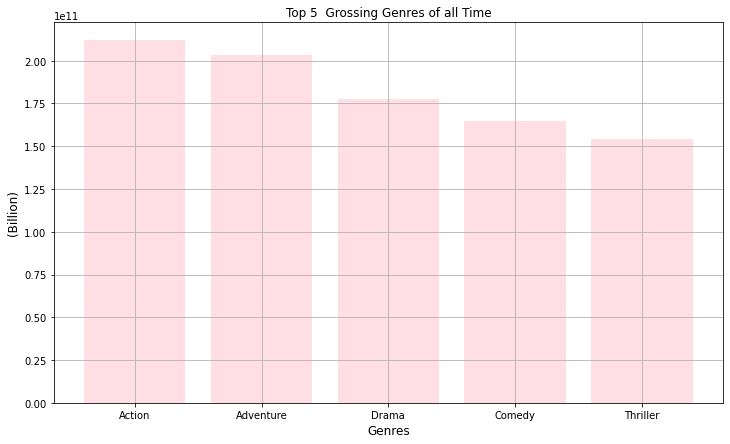

In [63]:
plt.subplots(figsize=(12, 7))

plt.title('Top 5  Grossing Genres of all Time')
plt.bar(top_genres, genres_gross, color='pink', alpha=0.5)
plt.ylabel('(Billion)', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.grid()




### Who are the top 10 grossing directors?

In [52]:
top_10_grossing_directors = df_only_financial_records_revadj.groupby('director')['revenue_adj'].sum()
top_10_grossing_directors.sort_values(axis=0, ascending=False, inplace=True)
top_10_grossing_directors.head(10)


director
Steven Spielberg     1.520245e+10
James Cameron        7.327221e+09
Peter Jackson        7.019848e+09
George Lucas         6.313919e+09
Robert Zemeckis      5.655648e+09
Michael Bay          5.460672e+09
Chris Columbus       4.893486e+09
Tim Burton           4.529285e+09
David Yates          4.177455e+09
Christopher Nolan    4.164262e+09
Name: revenue_adj, dtype: float64

In [53]:
top_directors = top_10_grossing_directors.index[0:10]

In [54]:
directors_gross = top_10_grossing_directors.values[0:10]

Text(0.5, 0, '(Billion)')

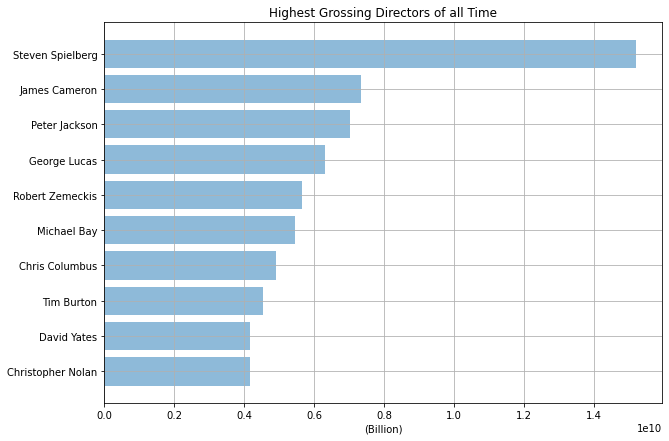

In [64]:
plt.subplots(figsize=(10, 7))


plt.title('Highest Grossing Directors of all Time')
plt.barh(top_directors, directors_gross, alpha=0.5)
plt.gca().invert_yaxis()
plt.grid()

plt.xlabel('(Billion)')


### Compare the revenue of the highest grossing movies of all time.

In [56]:
top_10_grossing_movies = df_only_financial_records_revadj.groupby('original_title')['revenue_adj'].sum()
top_10_grossing_movies.sort_values(axis=0, ascending=False, inplace=True)
top_10_grossing_movies.head(10)



original_title
Avatar                            2.827124e+09
Star Wars                         2.789712e+09
Titanic                           2.506406e+09
The Exorcist                      2.167325e+09
Jaws                              1.907006e+09
Star Wars: The Force Awakens      1.902723e+09
E.T. the Extra-Terrestrial        1.791694e+09
The Net                           1.583050e+09
One Hundred and One Dalmatians    1.574815e+09
The Avengers                      1.508100e+09
Name: revenue_adj, dtype: float64

In [57]:
grossing_movies = top_10_grossing_movies.index[0:10]
grossing_movies

Index(['Avatar', 'Star Wars', 'Titanic', 'The Exorcist', 'Jaws',
       'Star Wars: The Force Awakens', 'E.T. the Extra-Terrestrial', 'The Net',
       'One Hundred and One Dalmatians', 'The Avengers'],
      dtype='object', name='original_title')

In [58]:
grossing_values = top_10_grossing_movies.values[0:10]
grossing_values

array([2.82712375e+09, 2.78971224e+09, 2.50640574e+09, 2.16732490e+09,
       1.90700584e+09, 1.90272313e+09, 1.79169431e+09, 1.58304954e+09,
       1.57481474e+09, 1.50810021e+09])

Text(0.5, 0, '(Billion)')

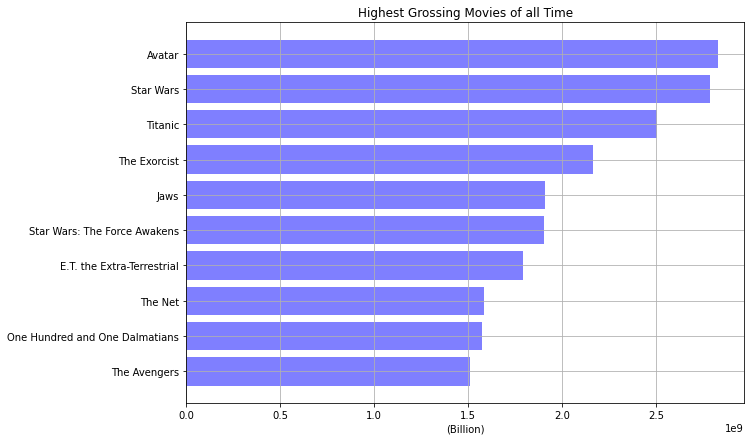

In [59]:
plt.subplots(figsize=(10, 7))

plt.title('Highest Grossing Movies of all Time')

plt.barh(grossing_movies, grossing_values, color='b', alpha=0.5)
plt.gca().invert_yaxis()
plt.grid()


plt.xlabel('(Billion)')




<a id='conclusions'></a>
## Conclusions

* Avatar is the highest-grossing movie of all time.

* Steven Spielberg is the highest-grossing director of all time.

* Action movies (not to my surprise) are the highest-grossing movies..

* Disney is not one of the top 5 highest-grossing production companies during the last 10 years.